In [ ]:
import numpy as np
import random

class HopfieldNetwork:
    def __init__(self,number_of_neurons):
        self.n = number_of_neurons
        self.w = np.zeros((number_of_neurons,number_of_neurons)) #Macierz wag
        self.b = np.zeros(number_of_neurons) #Wektor progów
            
    def get_patterns(self, patterns): #Uczenie paternów za pomocą reguły Heba
        for i in range(len(patterns)): 
            self.w += np.outer(patterns[i], patterns[i])
        self.w /= len(patterns)
        self.w -= np.identity(self.n)
        
    def activation(self,x,b):
        return np.where(x >= b, 1, -1)

    
    def update_rule(self, state):
        updated_state = state.copy()
        order = np.random.permutation(self.n)
        for i in order:
            net_input = np.dot(self.w[i, :], state)
            updated_state[i] = self.activation(net_input, self.b[i])
        return updated_state

    def energy(self, state):
        return -0.5 * np.dot(state, np.dot(self.w , state))
    
    def simulate(self, state, max_steps=100):
        current_state = state.copy()
        current_energy = self.energy(current_state)
        for _ in range(max_steps):
            next_state = self.update_rule(current_state)
            next_energy = self.energy(next_state)
            if np.array_equal(next_state, current_state):
                print("Network stabilized.")
                break
            elif next_energy >= current_energy:
                print("Energy increased, stopping update.")
                break
            current_state = next_state
            current_energy = next_energy
        return current_state
            
        
        
            

In [35]:
pattern1 = [1, -1, 1, -1]
pattern2 = [1, 1, -1, -1]
patterns = [pattern1,pattern2]
net = HopfieldNetwork(4)
net.get_patterns(patterns)

original_pattern = pattern1
noise = np.random.choice([-1, 1], size=4, p=[0.1, 0.9])  # 10% noise
noisy_input = original_pattern * noise

# Run the simulation
final_state =net. simulate(noisy_input)

# Display results
print("Initial noisy input:")
print(noisy_input)
print("Final state after simulation:")
print(final_state)
print("Stored patterns:")
print(patterns)

Network stabilized.
Initial noisy input:
[ 1 -1  1 -1]
Final state after simulation:
[ 1 -1  1 -1]
Stored patterns:
[[1, -1, 1, -1], [1, 1, -1, -1]]


In [38]:
import csv
def read_patterns_from_csv(file_name):
    patterns = []
    with open(file_name, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            pattern = np.array([int(x) for x in row])
            patterns.append(pattern)
    return np.array(patterns)

In [41]:
patterns = read_patterns_from_csv("small-7x7.csv")
net = HopfieldNetwork(49)
net.get_patterns(patterns)

original_pattern = patterns[1]
noise = np.random.choice([-1, 1], size=49, p=[0.1, 0.9])  # 10% noise
noisy_input = original_pattern * noise

# Run the simulation
final_state =net. simulate(noisy_input)

# Display results
print("Initial noisy input:")
print(noisy_input)
print("Final state after simulation:")
print(final_state)
print("Stored patterns:")
print(patterns)

Network stabilized.
Initial noisy input:
[ 1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1
  1]
Final state after simulation:
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1]
Stored patterns:
[[ 1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
   1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
   1]
 [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
   1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1
   1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1
  -1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1


In [44]:
import matplotlib.pyplot as plt
def visualize_pattern(pattern,n,m):
    grid = pattern.reshape((n, m))
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='binary', interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

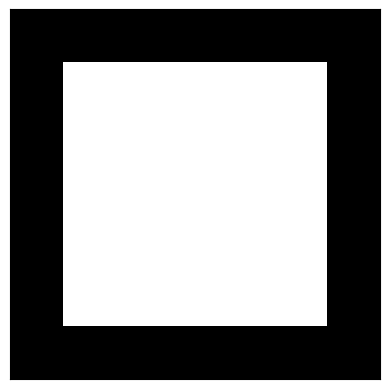

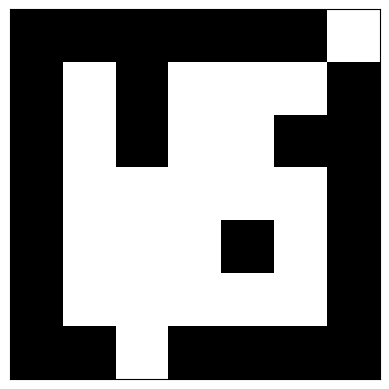

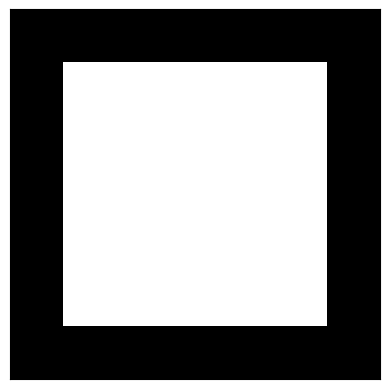

In [46]:
visualize_pattern(original_pattern,7,7)
visualize_pattern(noisy_input,7,7)
visualize_pattern(final_state,7,7)
